# Differentiation and interpolation

In [ ]:
'''     Codes to calculate finite differences, and evaluate Newton's interpolation polynomial     '''


import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i,j] = (coef[i+1,j-1] - coef[i,j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p


1. Using the following data:


  \begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|}\hline\\ 
  \textrm{Time:}  & 0  &  20 & 40 &  60 &  80 &  100 & 120 &  140 & 160  & 180 & 200 \\ \hline\\ 
  \textrm{Peniciline concentration:}  & 0  &  106 & 1600 & 3000 & 5810 & 8600 & 9430 & 10950 & 10280 & 9620 & 9400    \\ \hline
  \end{array}


    
> - Use the previous functions to approximate the peniciline concentrations at $t = 10, 50, 90, 130, 170,$ and $190$. 

> - Evaluate the interpolation polynomial at $t=250$ and add this point to the plot. Does it look like a sensible approximation?

2. Given the function $f(x)=\frac{1}{1+x^2}$ (Runge's function) and the points $x_i=-5,-4,-3,...,3,4,5$

>- Plot the interpolation polinomial calculated for that set of nodes.

>- Do the same for this new set of nodes $x_i=-5,-4.5,-4,...,4,4.5,5$.

>- Check the following link:

> [Scipy spline interpolation](https://docs.scipy.org/doc/scipy/tutorial/interpolate.html)

> Read "1-D interpolation (interp1d)" to find out how to calculate linear, cuadratic and cubic splines using interp1d. Then use it to approximate Runge's function.



**Notes:** 

- To plot the interpolation polynomials, evaluate them at a set of points defined as follows:

t = np.linspace(a,b,N,endpoint=True) 

(For example, for the first exercise: t=np.linspace(0,200,201,endpoint=True) )

# Solution 

### Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

plt.style.use('seaborn-poster')

### Redundant methods

In [2]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i,j] = (coef[i+1,j-1] - coef[i,j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

## Exercise 1

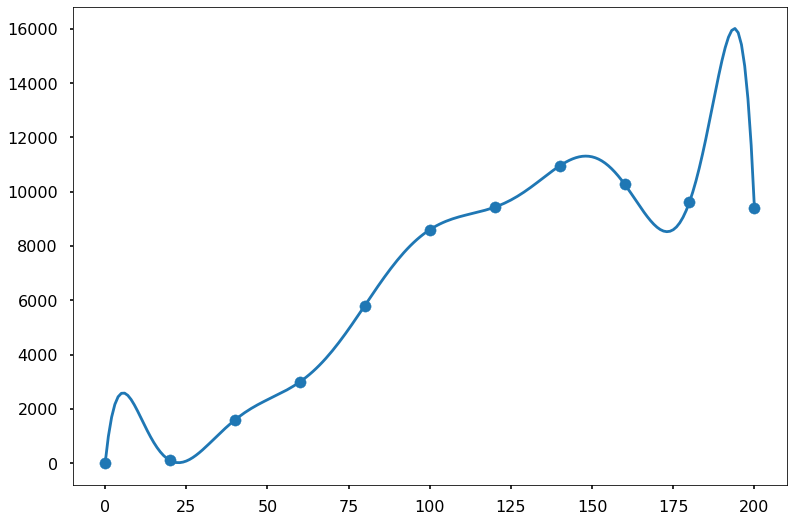

In [5]:
time = [0,20,40,60,80,100,120,140, 160, 180, 200]
pen = [0, 106, 1600, 3000, 5810, 8600, 9430, 10950, 10280, 9620, 9400]

coefs = divided_diff(time, pen)[0]

fig, ax = plt.subplots()

ax.scatter(time, pen)
ax.plot(np.arange(0,201, 1),[newton_poly(coefs, time, x) for x in np.arange(0,201, 1)])

plt.show()

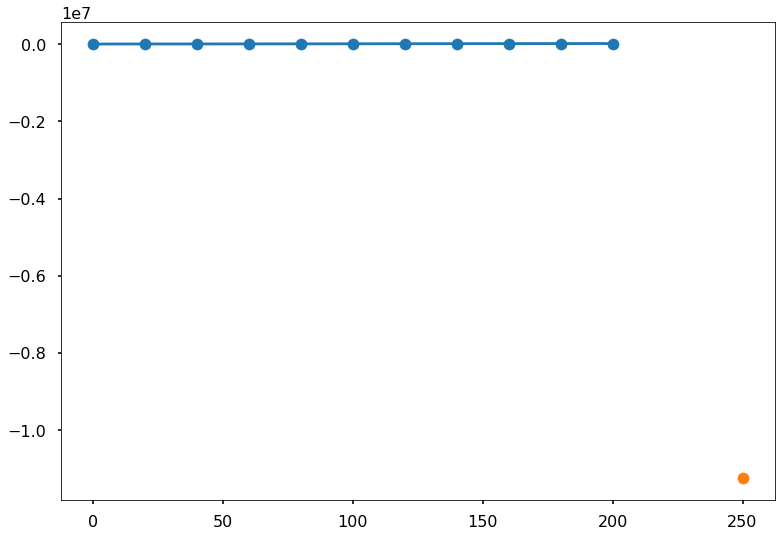

In [4]:
fig, ax = plt.subplots()

ax.scatter(time, pen)
ax.plot(np.arange(0,201, 1),[newton_poly(coefs, time, x) for x in np.arange(0,201, 1)])
plt.scatter(250, newton_poly(coefs, time, 250))

plt.show()

It evidently is not a sensible approximation. Your solutions go from 0 to 16_000 and this point is of the order of $-10^{-7}$

## Exercise 2

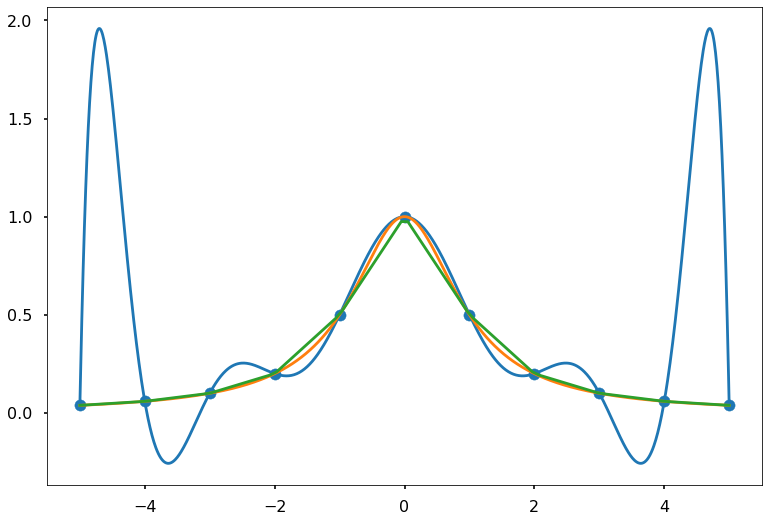

In [7]:
def f(x):
    return 1 / (1 + x**2)


x = np.linspace(-5,5, 11, endpoint=True)
f_x = f(x)

coef = divided_diff(x, f_x)[0]

fig, ax = plt.subplots()

ax.scatter(x, f_x)

x_2 = np.arange(-5, 5.01, 0.01)
ax.plot(x_2, [newton_poly(coef, x, x_i) for x_i in x_2])

ax.plot(x_2, f(x_2))


f_new = interp1d(x, f_x)

x_3 = np.linspace(-5, 5, 100, endpoint=True)
plt.plot(x_3, f_new(x_3))


plt.show()
